#Data-driven Advice for Applying Machine Learning to Bioinformatics Problems


생체정보학 문제에 머신러닝을 적용하기 위한 데이터를 처리하는 조언

As the bioinformatics field grows, it must keep pace not only with new data but with new algorithms. Here we contribute a thorough analysis of 13 state-of-the-art, commonly used machine learning algorithms on a set of 165 publicly available classification problems in order to provide data-driven algorithm recommendations to current researchers. We present a number of statistical and visual comparisons of algorithm performance and quantify the effect of model selection and algorithm tuning for each algorithm and dataset. The analysis culminates in the recommendation of five algorithms with hyperparameters that maximize classifier performance across the tested problems, as well as general guidelines for applying machine learning to supervised classification problems.

생체정보학이 성장할수록, 새로운 데이터와 알고리즘이 보조를 맞추고 있다.

**이 논문에는 현재 연구자들에게 data-driven알고리즘을 제공하기 위해 공개적으로 위해 공개적으로 사용 가능한 165개 분류 문제 세트에 대해 일반적으로 사용되는 13개의 최첨단 기계 학습 알고리즘에 대한 철저히 분석했다.**



많은 통계, 알고리즘 결과에 대한 시각적 비교를 제공하고, 그리고 각각의 알고리즘과 데이터 셋에 대한 알고리즘 튜닝, 그리고 모델 선택의 영향을 정형화 했다. 

**분석은 테스트된 문제 전반에서 분류기 성능을 최대화하는 하이퍼파라미터를 가진 5가지 알고리즘과 통제된 분류 문제에 기계 학습을 적용하기 위한 일반적인 지침을 제공한다.**

##1. introduction

도입

The bioinformatics field is increasingly relying on machine learning (ML) algorithms to con- duct predictive analytics and gain greater insights into the complex biological processes of the human body.1 For example, ML algorithms have been applied to great success in GWAS, and have proven effective at detecting patterns of epistasis within the human genome. Recently, deep learning algorithms were used to detect cancer metastases on high-resolution pathology images3 at levels comparable to human pathologists. These results, among others, indicate heavy interest in ML development and analysis for bioinformatics applications.
Owing to the development of open source ML packages and active research in the ML field, researchers can easily choose from dozens of ML algorithm implementations to build predictive models of complex data. Although having several readily-available ML algorithm implementations is advantageous to bioinformatics researchers seeking to move beyond simple statistics, many researchers experience “choice overload” and find difficulty in selecting the right ML algorithm for their problem at hand.As a result, some ML-oriented bioinformatics projects could be improved simply through the use of a better ML algorithm.

생체정보학 분야에 많이 사용되고 있고, 특히 GWAS기술이 대표적이다.

병리학자들과 비교해서 높은 퍼포먼스를 가지고 있고, 따라서 ml분야에 많은 관심을 가지고 있다.

너무 많은 ml모델이 있어서 병리학자들이 선택하기 힘들어한다. 따라서 더 좋은 모델을 쓰는 것만으로 프로젝트가 개선될 수 있다.

ML researchers are aware of the challenges that algorithm selection presents to ML prac- titioners. As a result, there have been some efforts to empirically assesses different algorithms across sets of problems, beginning in the mid 1990s with the StatLog project.

ml연구진들은 ml실무진들에게 알고리즘을 선택하는 것에 대한 어려움을 알고있다. 결과적으로 경험적으로 알고리즘을 평가하려는 시도가 1990년 중반부터 있어왔다.

Early work in this ﬁeld also emphasized bioinformatics applications. More recently, Caruana et al. and Fern´andez-Delgado et al. analyzed several supervised learning algorithms, coupled with some parameter tuning. The aforementioned literature often compared many algorithms but on rel- atively few example problems (between 4 and 12), with only using upwards of 112 example problems. In the time since these assessments, researchers have moved towards standardized, open source implementations of ML algorithms (e.g. scikit-learn and Weka), and the number of publicly available datasets that can be used for comparison have skyrocketed, leading to the creation of decentralized, collaboration-based analyses such as the OpenML project.How- ever, the value of focused, reproducible ML experiments is still paramount.These observations motivated our work, in which we conduct a contemporary, open source, and thorough com- parison of ML algorithms across a large set of publicly available problems, including several bioinformatics problems.

이전에 있던 문헌들은 많은 알고리즘을 비교했지만, 상대적으로 적은 예제(4-12)를 비교했고, 112개의 예제만 사용했다. 이후에 , 연구자들은 표준화된 머신러닝 알고리즘 오픈소스로 향했으며, 그리고 비교에 사욛될 수 있는 다수의 공개적으로 사용가능한 데이터셋은 급증했고, OpenML 프로젝트와 같은 분산형 협업 기반 분석이 초래되었다.


아무리 그 가치가 중요하다고 해도, 재현 가능한 ML 연구는 다른 무엇보다 중요하다.

In this paper, we take a detailed look at 13 popular open source ML algorithms and analyze their performance across a set of 165 supervised classiﬁcation problems in order to provide data-driven advice to practitioners who wish to apply ML to their datasets. A key part of this comparison is a full hyperparameter optimization of each algorithm.

**우리는 실무자들에게 data_driven 조언을 주기 위해 이번에 13가지 오픈 소스 머신러닝 알고리즘을 세부적으로 다룰것이고, 그들의 성과를 165개 분류 문제를 통해 분석할것이다, 이 비교의 핵심은 각 알고리즘의 완전한 하이퍼파라미터 최적화다.**

The results highlight the importance of selecting the right ML algorithm for each problem, which can improve prediction accuracy signiﬁcantly on some problems. Further, we empirically quantify the eﬀect of hyperparameter (i.e. algorithm parameter) tuning for each ML algorithm, demonstrating marked improvements in the predictive accuracy of nearly all ML algorithms. We show that the underlying behaviors of various ML algorithms cluster in terms of performance, as might be expected. Finally, based on the results of the experiments, we provide a reﬁned set of recommendations for ML algorithms and parameters as a starting point for future researchers.

모델 선택으로 정확도가 달라진다. 우린 이걸 증명하면서 미래 연구진들에게 시작점으로써 정제된 알고리즘 추천을 제공할것이다.

##2. methods

방법론

In this study, we compared 13 popular ML algorithms from scikit-learn, a widely used ML library implemented in Python. Each algorithm and its hyperparameters are described in Ta- ble 1. The algorithms include Na¨ıve Bayes algorithms, common linear classiﬁers, tree-based al- gorithms, distance-based classiﬁers, ensemble algorithms, and non-linear, kernel-based strate- gies. The goal was to represent the most common classes of algorithms used in literature, as well as recent state-of-the-art algorithms such as Gradient Tree Boosting

연구에서, 우리는 **13개의 사이킷런 알고리즘**을 다룰것.
나이브 베이즈, 선형 회귀, 트리 기반,등등.

table 1은 각각의 알고리즘과 하이퍼파라미터가 묘사되어있다.

table 1: 실험에서 튜닝된 머신러닝과 하이퍼파라미터
# 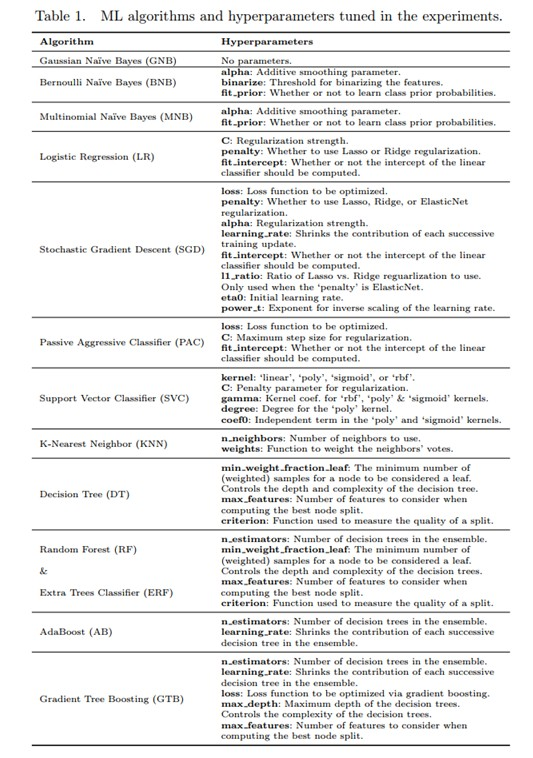

For each algorithm, the hyperparameters were tuned using a ﬁxed grid search with 10- fold cross-validation. In our results, we compare the average balanced accuracy over the 10 folds in order to account for class imbalance. We used expert knowledge about the reasonable hyperparameters to specify the ranges of values to tune for each algorithm. It is worth noting that we did not attempt to control for the number of total hyperparameter combinations budgeted to each algorithm. As a result, algorithms with more parameters have an advantage in the sense that they have more training attempts on each dataset. However, it is our goal to report as close to the best performance as possible for each algorithm on each dataset, and for this reason we chose to optimize each algorithm as thoroughly as possible.

k-fold 교차 검증을 사용해서 하이퍼파라미터를 튜닝했고, 이걸 바탕으로 비교했고, 가능한 최대한 최적화를 시켰다.

The algorithms were compared on 165 supervised classiﬁcation datasets from the Penn Ma- chine Learning Benchmark (PMLB).13 PMLB is a collection of publicly available classiﬁcation problems that have been standardized to the same format and collected in a central locationwith easy access via Pythona. Although not limited to problems in biology and medicine, PMLB includes many biomedical classiﬁcation problems, including tasks such as disease di- agnosis, post-operative decision making, and exon boundary identiﬁcation in DNA, among others. A sample of the biomedical classiﬁcation tasks contained in PMLB is listed in Table 2.

PMLB은 여러 생체정보학에 대한 데이터를 많이 포함하고 있고, table 2에 pmlb에 포함된 생체 분류 샘플이 정렬되어 있다.

table 2 생체 **의학적인 분류**에 존재하는 plmb 보관소 내에 포함된 빠진것이 많은 데이터 샘플
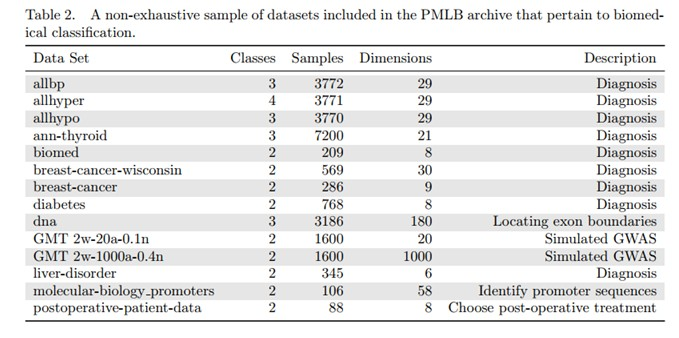

Prior to evaluating each ML algorithm, we scaled the features of every dataset by sub- tracting the mean and scaling the features to unit variance. This scaling step was necessitated by some ML algorithms, such as the distance-based classiﬁers, which assume that the features of the datasets will be scaled appropriately beforehand.

ml알고리즘을 평가하기 전에 데이터에 대한 스케일링을 해야 한다.

The entire experimental design consisted of over 5.5 million ML algorithm and parameter evaluations in total, resulting in a rich set of data that is analyzed from several viewpoints in Section 3. As an additional contribution of this work, we have provided the complete code required both to conduct the algorithm and hyperparameter optimization study, as well as access to the analysis and resultsb. Doing so allows researchers to easily compare algorithm performance on the datasets that are most similar to their own, and to conduct further analysis pertaining to their research.

전체 실험 설계는 총 550만 개 이상의 ML 알고리즘과 매개 변수 평가로 구성되었으며, 결과적으로 섹션 3의 여러 관점에서 분석되는 풍부한 데이터 세트가 생겼다. 그리고 우리는 코드를 제공한다.

##3.Result

결과

In this section, we analyze the algorithm performance results through several lenses. First we compare the performance of each algorithm across all datasets in terms of best balanced accuracy in Section 3.1. We then look at the eﬀect of hyperparameter tuning and model selection in Section 3.2. Finally, we analyze how algorithms cluster across the tested problems, and present a set of algorithms that maximize performance across the datasets in Section 3.3.

Section 3.1 : 모든 데이터 셋에 대한 각각의 알고리즘 결과를 가장 균형잡힌 정확도를 기반으로 비교했다.

Section 3.2 : 하이퍼 파라미터 튜닝과 모델 선택의 영향력을 볼것이다.

Section 3.3 : 알고리즘이 어떻게 테스트된 문제를 통해 모이는지, 그리고 데이터 셋을 통해 최고의 성과를 가진 알고리즘에 대해 제시할 것이다.

###3.1.    Algorithm   Performance

알고리즘 평가

As a simple bulk measure to compare the performance of the 13 ML algorithms

we plot the mean rankings of the algorithms across all datasets in Figure 1. 

Ranking is determined by the 10-fold CV balanced accuracy of each algorithm on a given dataset, with a lower ranking indicating higher accuracy. 

The rankings show the strength of ensemble-based tree algorithms in generating accurate models: The ﬁrst, second, and fourth-ranked algorithms belong to this class of algorithms. The three worst-ranked algorithms also belong to the same class of Na¨ıve Bayes algorithms.

13개의 알고리즘 성과 비교를 위한 간단한 대량 측정으로, 

우리는 그림 1의 모든 데이터 세트에 걸쳐 알고리즘의 평균 순위를 표시한다.

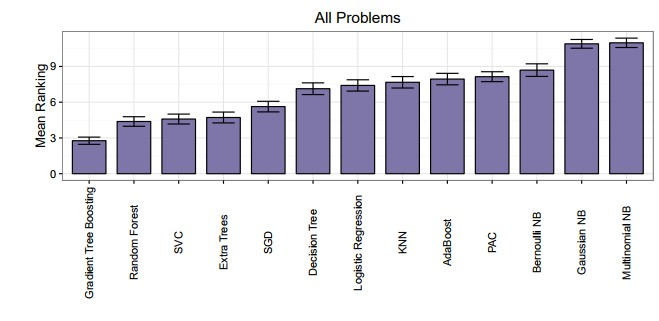

그림 1: 모든 데이터 셋에 대한 머신러닝 알고리즘의 평균 순위

순위는 주어진 데이터 세트에서 각 알고리듬의 **10-fold CV**에 의해 결정되며, 순위가 낮을수록 더 높은 정확도를 나타낸다.

이 순위는 **앙상블 기반 트리 알고리즘**이 정확한 모델을 생성하는 데 있어 강점을 보여준다. 첫 번째, 두 번째, 네 번째 순위의 알고리즘은 이러한 종류의 알고리즘에 속한다. 최악의 3개의 알고리즘들은 또한 **Naıve Bayes 알고리즘**의 같은 클래스에 속한다.

In order to assess the statistical signiﬁcance of the observed diﬀerences in algorithm per- formance across all problems, we use the non-parametric Friedman test.

모든 문제를 거친 알고리즘의 성과에 관찰된 차이의 통계적인 의미를 평가하기 위해서, 우리는 프리드먼 비모수 통계를 사용했다.

The complete set of experiments indicate statistically signiﬁcant diﬀerences according to this test, and and so we present a pairwise post-hoc analysis in Table 3

전체 실험 세트는 이 테스트에 따라 통계적으로 유의미한 차이를 나타내며, 따라서 우리는 표 3에 페어와이즈 사후 분석을 제시한다.

The post-hoc test underlines the impressive performance of Gradient Tree Boosting, which signiﬁcantly outperforms every al- gorithm except Random Forest at the p < 0.01 level.

사후 테스트는 **그라데이션 트리 부스팅**의 인상적인 성능을 강조하는데, 이는 p < 0.01 수준에서 랜덤 포리스트를 제외한 모든 알고리듬을 크게 능가한다.

compared here. Because the No Free Lunch theorem15 guarantees that all algorithms perform the same on average over all possible classes of problems, the diﬀerentiated results imply that the problems in the PMLB belong to a related subset of classes.

여기를 비교해보자. 공짜 점심은 없다는 이론(특정한 문제에 최적화된 알고리즘은 다른 문제에서는 그렇지 않다는 것을 수학적으로 증명한 정리)는 모든 알고리듬이 가능한 모든 문제 클래스에 대해 평균적으로 동일하게 수행할 것을 보장하고, 차별화 된 결과는 PMLB의 문제가 클래스의 관련 하위 집합에 속한다는 것을 보장한다.

the initial PMLB study also noted the similarity in properties of several publicly available datasets, which could lead to inﬂated statistical signiﬁcance. Nevertheless, it cannot be denied that the results are rel- evant to classiﬁcation tasks encountered in real-world and biological contexts, since the vast majority of datasets used here are taken from those contexts.

초기 PMLB 연구는 또한 부풀려진 통계학적 중요성을 이끌어 내는 공개적으로 사용 가능한 여러 데이터 세트의 특성에서 유사성에 집중했다.

그럼에도 불구하고, 여기서 사용되는 데이터 세트의 대부분은 그러한 맥락에서 추출되기 때문에, 결과가 실제 및 생물학적 맥락에서 발생하는 분류 작업과 관련이 있다는 것을 부인할 수 없다.

Given these bulk results, it is tempting to recommend the top-ranked algorithm for all problems. However, this neglects the fact that the top-ranked algorithms may not outperform others for some problems. 

Furthermore, when simpler algorithms perform on par with a more complex one, it is often preferable to choose the simpler of the two. 

With this in mind, we investigate pair-wise “outperformance” by calculating the percentage of datasets for which one algorithm outperforms another, shown in Figure 2

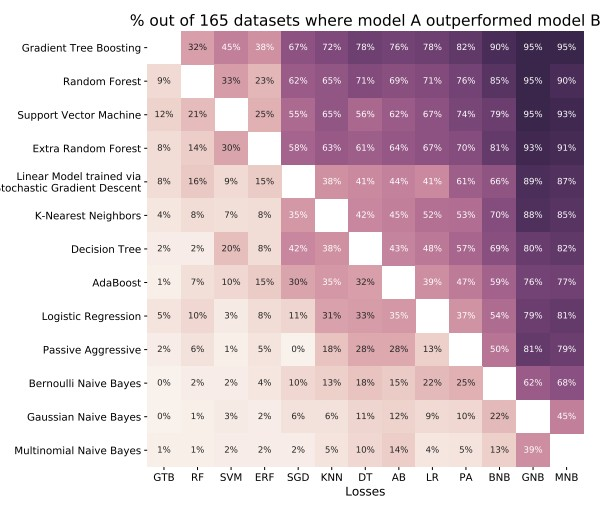

One algorithm outperforms another on a dataset if it has at least a 1% higher 10-fold CV balanced accuracy, which represents a minimal threshold for improvement in predictive accuracy.

이런 대량의 결과를 고려하면, 이것은 모든 문제에서 최상위 알고리즘을 추천하는 의도로 보인다. 그러나 이것은 최상위 알고리듬이 일부 문제에 대해 다른 알고리듬보다 성능이 우수하지 않을 수 있다는 사실로 부정한다.  

더욱이 더 간단한 알고리즘이 더 복잡한 것과 수행할때, 이것은 종종 더 간단한 2번째를 고르는 걸 선호한다.

이런 생각에서, 우리는 그림2에서 나타낸, 한 알고리즘이 다른 것을 능가하는 데이터 셋의 비율을 계산한 것에 의한 pair_wise 성과를 분석했다.

만약 한 알고리즘이 예측가능한 정확도의 개선을 위해 최소 3번 실시한 10-폴드 cv 정확도보다 적어도 1%이상 나왔다면, 한 알고리즘은 그 데이터 셋에 다른 알고리즘 보다 성능이 뛰어나다.

In terms of “outperformance,” it is worth noting that no one ML algorithm performs best across all 165 datasets. 

For example, there are 9 datasets for which Multinomial NB performs as well as or better than Gradient Tree Boosting, despite being the overall worst- and best-ranked algorithms, respectively

Therefore, it is still important to consider diﬀerent ML algorithms when applying ML to new datasets

outperformance라는 관점에서, 165개 데이터 셋에 모두 최고인 머신러닝 알고리즘은 없다.

예를 들어, 각각, 전반적으로 최악 그리고 최고 순위의 알고리즘이지만, 9개 데이터 셋에 대해서 나이브 베이즈는 Gradient Tree Boosting만큼 잘 수행한다.

그러므로, 새로운 데이터 셋에 머신러닝을 적용할때, 다른 머신러닝 모델을 생각하는 것은 여전히 중요하다.

### 3.2 Eﬀect   of   Tuning   and   Model   Selection

Most ML algorithms contain several hyperparameters that can aﬀect performance signiﬁcantly

Our experimental results allow us to measure the extent to which hyperparameter tuning via grid search improves each algorithm’s performance compared to its baseline settings.

We also measure the eﬀect that model selection has on improving classiﬁer performance.

Figure  3  compares  the  performance  of  the  tuned  classiﬁer  to  its  default  settings  for  each algorithm  across  all  datasets.  The  results  demonstrate  why  it  is  unwise  to  use  default  ML  algorithm hyperparameters: tuning often improves an algorithm’s accuracy by 3-5%, depending on the algorithm.

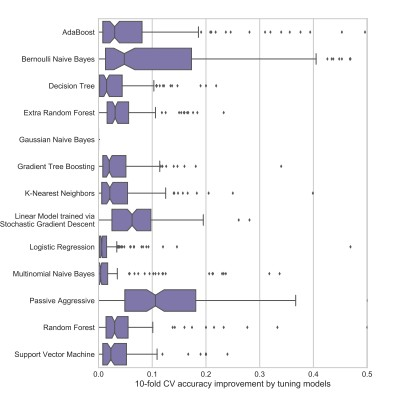

대부분의 머신러닝 모델은 성과에 상당히 영향을 미칠 수 있는 몇몇 하이퍼파라미터를 포함한다.

우리 실험 결과는 우리가 이것의 베이스 세팅과 비교해서 그리드 서치를 통해 하이퍼 파라미터 튜닝을 한 알고리즘의 성과의 정도를 측정할 수 있게 했다.

우리는 또한 모델 선택이 분류 성과를 향상시키는 영향을 측정했다.

그림3은 모든 데이터 셋에 각각의 알고리즘에 대한 고정된 설정과 튜닝된 분류의 성과를 비교한다.그 결과는 왜 고정된 머신러닝 알고리즘 하이퍼파라미터를 사용하는 것이 현명한 것이 아닌지 입증하고, 튜닝이 알고리즘의 종류에 따라 알고리즘의 정확도를 3에서 5%까지 향상시킨다.

Figure 4 shows the improvement in 10-fold CV accuracy attained both by model selection and hyperparameter optimization compared to the average performance on each dataset. 

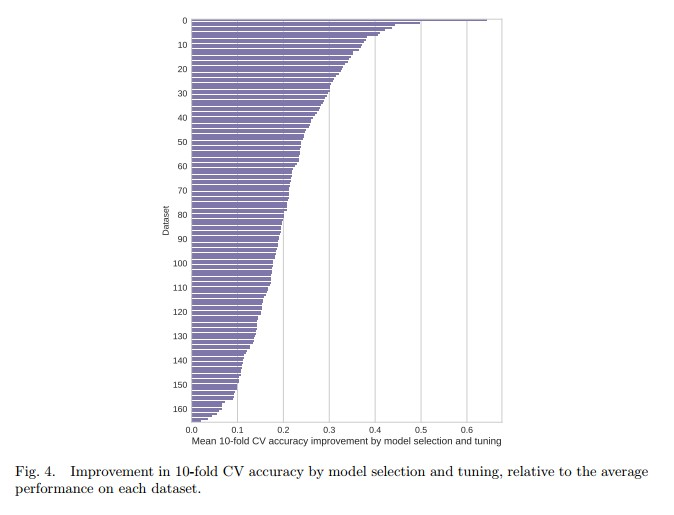

The results demonstrate that selecting the best model and tuning it leads to approximately a 20% increase in accuracy, up to more than a 60% improvement for certain datasets.

Thus, both selecting the right ML algorithm and tuning its parameters is vitally important for most problems.

그림4는 각각데이터셋의 평균 성과를 비교해서, 모델 선택에 의한 하이퍼파라미터와 옵티마이저 둘 다를 포함한 10-fold 교차검증의 개선을 보여준다.

결과는 최고의 모델을 선택하고 튜닝하는 것이 대략 정확도에서 20%, 특정 데이터셋에 대해서는 60%이상의 증가한걸 보여준다.

따라서 올바른 머신러닝 알고리즘 선택과 그리고 파라미터 튜닝은 모든 문제에 가장 중요하다.

###3.3 Algorithm   Coverage

Given that several of the 13 algorithms studied here have similar underlying methodologies, we would expect their performance across problems to align with the underlying assumptions that the modeling techniques have in common.

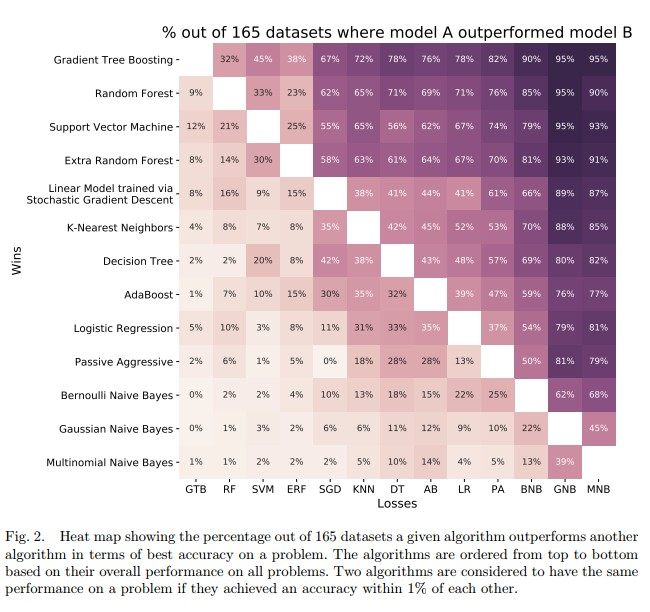

One way to assess whether this holds is to cluster the performance of diﬀerent algorithms across all datasets.

We perform hierarchical agglomerative clustering on the 10-fold CV balanced accuracy results, which leads to the clus- ters shown in Figure 5.

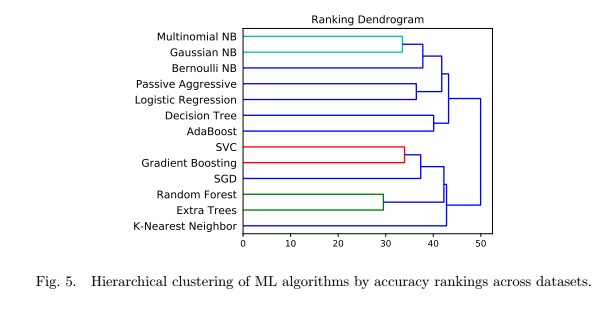

we ﬁnd that algorithms with similar underlying assumptions or methodologies cluster in terms of their performance across the datasets. For example, the Na¨ıve Bayes algorithms (i.e., Multinomial, Gaussian, and Bernoulli) perform most similarly to each other, and the linear algorithms (i.e., passive aggressive and logistic regression) also clus- ter. The ensemble algorithms of Extra Trees and Random Forests, which both use ensembles of decision trees, also cluster. Support Vector Machines and Gradient Tree Boosting appear to be quite diﬀerent algorithms, but given that both are able to capture nonlinear interactions between variables, it is less surprising that they cluster as well.

여기서 연구한 13개 알고리즘 중 몇몇은 유사한 근본적인 방법을 가지고 있다고 고려하면, 우리는 흔하게 사용되는 근본적인 추정을 조절하는 문제를 통해 그들의 성과를 예측 할 수 있다. 

우리는 10-fold 정확도 결과에 계층별 군집화를 수행했는데, 그림5에 나타난다.

우리는 데이터 셋을 통해 근본적으로 유사한 추정, 방법의 알고리즘이 그들의 결과라는 관점에서 모여있는 것을 발견했다.

Na¨ıve Bayes algorithm끼리,  linear algorithms 까리 모여있다.

엑스트라 트리, 랜덤포레스트등과 같은 앙상블 알고리즘도 서로 모여있다. 

Support Vector Machines and Gradient Tree Boosting 역시 다른 알고리즘 같지만, 서로 비선형이라는 상관 관계를 고려해서, 군집화 되어 있는 것은 놀라운 일이 아니다.

##Discussion   and   Conclusions

논의와 결론

We have empirically assessed 13 supervised classiﬁcation algorithms on a set of 165 supervised classiﬁcation datasets in order to provide a contemporary set of recommendations to bioin- formaticians who wish to apply ML algorithms to their data. The analysis demonstrates the strength of state-of-the-art, tree-based ensemble algorithms, while also showing the problem- dependent nature of ML algorithm performance. In addition, the analysis shows that selecting the right ML algorithm and thoroughly tuning its parameters can lead to a signiﬁcant im- provement in predictive accuracy on most problems, and is there a critical step in every ML application. We have made the full set of experiments and results available online to encourage bioinformaticians to easily gather information most pertinent to their area of study.

우리는 논문에서 모델 선택과 튜닝에 따라 모델의 정확도가 변화하는 걸 확인했다.

Even with a large set of results, it is diﬃcult to recommend speciﬁc algorithms or parameter settings with a strong amount of generality. As a starting point, we provided recommendations for 5 diﬀerent ML algorithms and parameters based on their collective coverage of the 165 datasets from PMLB. However, it is important to note that these algorithms and parameters will not work best on all supervised classiﬁcation problems, and they should only be used as starting points. For a more nuanced approach, the similarity of the dataset on which ML is to be applied to datasets in PMLB could be quantiﬁed, and the set of algorithms that performed best on those similar datasets could be used. In lieu of detailed problem information, one could also use automated ML tools16,17 and AI-driven ML platforms18 to perform model selection and parameter tuning automatically.

Of course, some bioinformaticians may value properties of ML algorithms aside from pre- dictive accuracy. For example, ML algorithms are often used as a “microscope” to model and better understand the complex biological systems from which the data was sampled. In this use case, bioinformaticians may value the interpretability of the ML model, in which case black box predictive models that cannot be interpreted are of little use.19 Although the lo- gistic regression and decision tree algorithms are often outperformed by tree-based ensemble algorithms in terms of predictive accuracy (Figure 2), linear models and shallow decision trees often provide a useful trade-oﬀ between predictive accuracy and interpretability. Furthermore, methods such as LIME19 show promise for explaining why complex, black box models make individual predictions, which can also be useful for model interpretation.

There  are  several  opportunities  to  extend  the  analysis  in  this  paper  in  future  work.  A  natu- ral  extension  should  be  made  to  regression,  which  is  used  several  biomedical  applications  suchas quantitative trait genetics. In addition, these experiments do not take into account feature preprocessing, feature construction, and and feature selection, although it has been shown that learning better data representations can signiﬁcantly improve ML performance.20 We plan to extend this work to analyze the ability of various feature preprocessing, construction, and selection strategies to improve model performance. In addition, the experimental results contain rich information about the performance of diﬀerent learning algorithms as a function of the datasets. In future work, we will take a deeper look into the properties of datasets that inﬂuence the performance of speciﬁc algorithms. By relating these dataset properties to speciﬁc areas of bioinformatics, we may be able to generate tailored recommendations for ML algorithms that work best for speciﬁc applications.

처음에 우리는 5개의 ml알고리즘과 파라미터를 추전했다. 그러나 이건 pmlb 데이터에만 적용되고 다른 데이터 셋은 다른 이야기다.
auto ml을 써봐라. 추천한다.